In [1]:
print("Hello World!")

Hello World!


# CA
## Subject:
## Lecturer: 
### Student: Vitalis Smirnovs
### Student ID:
## 2022

#### Document Outline:
1. Introduction;
2. Data Description;
3. Exploratory Data Analysis;
4. Statistical Analysis:
    * Correlation;
    * ANOVA;
    * Simple Regression;
    * ML Regression;
    * ML Decision Tree;
5. Conclusion & Discussion;
6. References.

# 1. INTRODOCTION
The purpose of this project is to explore crop yield in Ireland and environmental factors affecting the yield. <br>
Irish agriculture and crop yeild in Ireland: some stats, weather & international comparison

# 2. DATA DESCRIPTION
Finding relevant data is the fist step in data analysis. Finding good/clean data is the dream of any data analist. <br>

Despite the fact that huge amounts of data is generated every second, agriculturel data is not easy to obtain, especially in Ireland. Many Irish farmers farm "old style" and do not have a digital fingerprint. Data generated is often collected as a part of compulsory schemes where farmers provide data to receive government subsidies or as a part of complience proof. In addition farmers who signed up to Teagasc services participate in annual survey. <br>

Data generated is of good quality but impossible to access by anyone but specially authorised persons. <br>

Desite the difficulties spares data is available on CSO.ie [1]. In this project crop yield data for years 1985-2007 was used [2]. This dataset was enhanced with weather data on rainfall [3] and air temperature (???) [4]. <br>

### 2.1 Crop Yield Dataset
Crop yeild dataset [2] can be found in *data.gov.ie* data repository, which in tern cites CSO.ie as a source.
This dataset is well structured and contains the following fields:<br>

| FIELD        	| DESCRIPTION          	|
|--------------	|----------------------	|
| STATISTIC    	| Code for a Statistic 	|
| Statistic    	| Statistic Name       	|
| TLIST(A1)    	| Year                 	|
| Year         	| Year                 	|
| C02039V02469 	| Crop Code            	|
| Type of Crop 	| Crop Type            	|
| UNIT         	| Unit of measurement  	|
| VALUE        	| Value field          	|

### 2.2 Rainfall Data

The crop field data is enhanced with weather data. More specifically with rainfall data that can be found on Met Eireann [3]. This dataset series cover the period 1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. <br>
This data contsins monthly (Jan to Dec) rinfall for years 1850 through 2010.
<br>
Descriptive statistics for all data is presentted and discussed below.

## 3. EXPLORATORY DATA ANALYSIS

In [2]:
# THIS BLOCK CAINTAINS PACKAGES USED AT SOME STAGE DURING DATA ANALYSIS
# some may not have eneded up in the final analysis
# import libraries that are needed for this project
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltpy
import seaborn as sns
import scipy.stats as stats
import termcolor
from termcolor import colored
#import pymc3 
# note: had to: pip install astroML & pip install pymc3
from astroML.plotting import setup_text_plots
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pickle 

C:\Users\offsm\anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [3]:
# THESE ARE FUNCTIONS TO BEAUTIFY BORING OUTPUT
#************************************************
# https://forums.fast.ai/t/jupyter-notebook-enhancements-tips-and-tricks/17064/5
# these are the functions to help to make output look nicer and easier to read
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))                                           # for printing in bold

def printmd(string, color=None):                                               
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)  # printing in colour
    display(Markdown(colorstr))

### 3.1. Crop Yield Data: Data Manupulation and Descriptives


The first and handy step is to import data into the dataframe and have a quick look that data loaded correctly.

In [4]:
# data source: https://data.gov.ie/dataset/aqa03-crop-yield-1985-2007/resource/2bebaae8-f9a0-4080-9e67-a1f2e130a943
# Import data
df1 = pd.read_csv('dataCA2_v2.csv') # read in the data into a dataframe
df1                                      # display dataframe

,Year,Code,Crop,CropArea,Yield_ha,Yield,Unnamed: 6,Unnamed: 7
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,NaN,386.2
1,1985,11,Total wheat,77.7,6.4,495.0,NaN,NaN
2,1985,111,Winter wheat,60.3,6.5,395.0,NaN,NaN
3,1985,112,Spring wheat,17.4,5.8,100.0,NaN,NaN
4,1985,12,Total oats,24.9,5.1,126.0,NaN,NaN
...,...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,NaN,NaN
387,2007,5,Turnips,NaN,NaN,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.drop('Unnamed: 6', inplace=True, axis=1)
df1

,Year,Code,Crop,CropArea,Yield_ha,Yield,Unnamed: 7
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,386.2
1,1985,11,Total wheat,77.7,6.4,495.0,NaN
2,1985,111,Winter wheat,60.3,6.5,395.0,NaN
3,1985,112,Spring wheat,17.4,5.8,100.0,NaN
4,1985,12,Total oats,24.9,5.1,126.0,NaN
...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,NaN
387,2007,5,Turnips,NaN,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN,NaN


To get an overview of the data **df.info()** is usefull. Table 1 shows that our data has 391 rows (rows index 0 to 390), and 6 columns with variables. Five of the variables are numerical - Year, code, CropArea, Yield_ha and Yield, while one - crop is nominal/categorical variables.

To ensure that data imported correctly **df.head()** and **df.tail()** are usefull to have a quick view of the top and bottom rows of data (see Table 2 and Table 3).

In [6]:
df1.drop('Unnamed: 7', inplace=True, axis=1)
df1

,Year,Code,Crop,CropArea,Yield_ha,Yield
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0
1,1985,11,Total wheat,77.7,6.4,495.0
2,1985,111,Winter wheat,60.3,6.5,395.0
3,1985,112,Spring wheat,17.4,5.8,100.0
4,1985,12,Total oats,24.9,5.1,126.0
...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0
387,2007,5,Turnips,NaN,NaN,NaN
388,2007,61,Sugar beet,NaN,NaN,NaN
389,2007,62,Fodder beet,NaN,NaN,NaN


In [7]:
# have a look at the data, to see what it looks like
printmd("**Table 1: Data info**", color='red')      
print("----------------------------------")
print(df1.info())                                    # print data info on screen

printmd("**Table 2: Data head**", color='red')     
print("----------------------------------")
print(df1.head())                                    # view top of the data set

printmd("**Table 3: Data tail**", color='red')
print("----------------------------------")
print(df1.tail())                                    #view bottom of the data set#
printmd("**Table 4: Data Summary Stats**", color='red')                 # print table numbers and headings
printmd("----------------------------------------------", color='red')  # separate output by a line
print(df1.describe())     

<span style='color:red'>**Table 1: Data info**</span>

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      391 non-null    int64  
 1   Code      391 non-null    int64  
 2   Crop      391 non-null    object 
 3   CropArea  368 non-null    float64
 4   Yield_ha  368 non-null    float64
 5   Yield     368 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.5+ KB
None


<span style='color:red'>**Table 2: Data head**</span>

----------------------------------
   Year  Code                          Crop  CropArea  Yield_ha   Yield
0  1985     1  Total wheat, oats and barley     386.2       5.1  1986.0
1  1985    11                   Total wheat      77.7       6.4   495.0
2  1985   111                  Winter wheat      60.3       6.5   395.0
3  1985   112                  Spring wheat      17.4       5.8   100.0
4  1985    12                    Total oats      24.9       5.1   126.0


<span style='color:red'>**Table 3: Data tail**</span>

----------------------------------
     Year  Code                    Crop  CropArea  Yield_ha  Yield
386  2007     4                Potatoes      11.7      34.0  399.0
387  2007     5                 Turnips       NaN       NaN    NaN
388  2007    61              Sugar beet       NaN       NaN    NaN
389  2007    62             Fodder beet       NaN       NaN    NaN
390  2007     7  Kale and field cabbage       NaN       NaN    NaN


<span style='color:red'>**Table 4: Data Summary Stats**</span>

<span style='color:red'>----------------------------------------------</span>

              Year        Code    CropArea    Yield_ha        Yield
count   391.000000  391.000000  368.000000  368.000000   368.000000
mean   1996.000000   53.529412   60.465761   16.276902   536.256522
std       6.641748   53.407562   85.212043   18.614356   578.540756
min    1985.000000    1.000000    0.000000    0.000000     0.000000
25%    1990.000000    5.000000    8.350000    5.900000    89.525000
50%    1996.000000   13.000000   20.750000    7.200000   305.500000
75%    2002.000000  112.000000   68.600000   12.950000   795.525000
max    2007.000000  132.000000  386.200000   73.700000  2500.900000


Before conducting any further investigation. let's load the 2nd data set - Rainfall data.

In [8]:
# climate data
# https://www.met.ie/climate/available-data/long-term-data-sets/
df2 = pd.read_csv('climateData1.csv') # read in the data into a dataframe
df2                                      # display dataframe


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1850,113.5,86.4,38.6,138.3,59.7,54.5,103.4,76.3,70.5,62.7,113.1,104.0
1,1851,195.0,55.2,79.9,54.7,45.0,101.5,90.3,96.6,49.4,113.4,45.4,68.8
2,1852,161.4,92.4,44.6,44.4,70.2,179.4,68.6,110.1,57.3,88.7,223.2,208.2
3,1853,144.7,43.0,83.5,75.3,33.2,77.5,100.5,82.9,60.2,185.1,106.0,48.4
4,1854,138.6,36.0,37.3,18.8,100.0,110.4,102.6,60.5,47.8,77.8,74.6,94.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,57.6,54.6,120.3,47.3,126.2,29.8,55.9,70.8,162.6,145.6,142.3,170.5
157,2007,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1
158,2008,174.3,58.0,113.5,45.1,42.3,101.9,123.8,175.9,108.2,152.4,80.4,73.7
159,2009,152.9,36.5,48.7,120.9,90.7,73.2,174.7,148.4,49.4,129.9,244.9,105.4


In [9]:
# have a look at the data, to see what it looks like
printmd("**Table 5: Data info**", color='red')      
print("----------------------------------")
print(df2.info())                                    # print data info on screen

printmd("**Table 6: Data head**", color='red')     
print("----------------------------------")
print(df2.head())                                    # view top of the data set

printmd("**Table 7: Data tail**", color='red')
print("----------------------------------")
print(df2.tail())                                    #view bottom of the data set#
printmd("**Table 8: Data Summary Stats**", color='red')                 # print table numbers and headings
printmd("----------------------------------------------", color='red')  # separate output by a line
print(df2.describe()) 

<span style='color:red'>**Table 5: Data info**</span>

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    161 non-null    int64  
 1   Jan     161 non-null    float64
 2   Feb     161 non-null    float64
 3   Mar     161 non-null    float64
 4   Apr     161 non-null    float64
 5   May     161 non-null    float64
 6   Jun     161 non-null    float64
 7   Jul     161 non-null    float64
 8   Aug     161 non-null    float64
 9   Sep     161 non-null    float64
 10  Oct     161 non-null    float64
 11  Nov     161 non-null    float64
 12  Dec     161 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 16.5 KB
None


<span style='color:red'>**Table 6: Data head**</span>

----------------------------------
   Year    Jan   Feb   Mar    Apr    May    Jun    Jul    Aug   Sep    Oct  \
0  1850  113.5  86.4  38.6  138.3   59.7   54.5  103.4   76.3  70.5   62.7   
1  1851  195.0  55.2  79.9   54.7   45.0  101.5   90.3   96.6  49.4  113.4   
2  1852  161.4  92.4  44.6   44.4   70.2  179.4   68.6  110.1  57.3   88.7   
3  1853  144.7  43.0  83.5   75.3   33.2   77.5  100.5   82.9  60.2  185.1   
4  1854  138.6  36.0  37.3   18.8  100.0  110.4  102.6   60.5  47.8   77.8   

     Nov    Dec  
0  113.1  104.0  
1   45.4   68.8  
2  223.2  208.2  
3  106.0   48.4  
4   74.6   94.9  


<span style='color:red'>**Table 7: Data tail**</span>

----------------------------------
     Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
156  2006   57.6   54.6  120.3   47.3  126.2   29.8   55.9   70.8  162.6   
157  2007  107.9  107.8   80.3   26.9   65.9  141.3  133.0  100.4   52.8   
158  2008  174.3   58.0  113.5   45.1   42.3  101.9  123.8  175.9  108.2   
159  2009  152.9   36.5   48.7  120.9   90.7   73.2  174.7  148.4   49.4   
160  2010   93.8   52.6   86.2   56.9   47.5   54.2  139.2   43.7  136.0   

       Oct    Nov    Dec  
156  145.6  142.3  170.5  
157   52.2   75.0  123.1  
158  152.4   80.4   73.7  
159  129.9  244.9  105.4  
160   80.1  135.8   62.5  


<span style='color:red'>**Table 8: Data Summary Stats**</span>

<span style='color:red'>----------------------------------------------</span>

              Year         Jan         Feb         Mar         Apr  \
count   161.000000  161.000000  161.000000  161.000000  161.000000   
mean   1930.000000  112.395652   82.643478   80.035404   68.823602   
std      46.620811   39.026873   37.376366   31.822668   27.904607   
min    1850.000000   16.500000    6.500000   16.900000    5.300000   
25%    1890.000000   84.400000   54.100000   56.600000   45.900000   
50%    1930.000000  111.900000   81.000000   83.300000   67.600000   
75%    1970.000000  139.400000  107.400000  100.700000   83.600000   
max    2010.000000  205.100000  192.500000  184.800000  143.500000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  161.000000  161.000000  161.000000  161.000000  161.000000  161.000000   
mean    71.055280   71.890062   82.469565   97.072671   90.686335  109.837267   
std     29.896201   32.913970   32.284577   37.574365   39.101038   39.859343   
min      7.700000    8.400000   18.900000   1

In [10]:
# clculate average yearly temperature
df2['averageRain'] = (df2['Jan'] +  df2['Feb'] +  df2['Mar'] 
                  +  df2['May'] +  df2['Jun'] +  df2['Jul'] 
                  +  df2['Aug'] +  df2['Sep'] +  df2['Oct'] 
                  +  df2['Nov'] +  df2['Apr'] +  df2['Dec']) / 12

In [11]:
df2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1850,113.5,86.4,38.6,138.3,59.7,54.5,103.4,76.3,70.5,62.7,113.1,104.0,85.083333
1,1851,195.0,55.2,79.9,54.7,45.0,101.5,90.3,96.6,49.4,113.4,45.4,68.8,82.933333
2,1852,161.4,92.4,44.6,44.4,70.2,179.4,68.6,110.1,57.3,88.7,223.2,208.2,112.375000
3,1853,144.7,43.0,83.5,75.3,33.2,77.5,100.5,82.9,60.2,185.1,106.0,48.4,86.691667
4,1854,138.6,36.0,37.3,18.8,100.0,110.4,102.6,60.5,47.8,77.8,74.6,94.9,74.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,57.6,54.6,120.3,47.3,126.2,29.8,55.9,70.8,162.6,145.6,142.3,170.5,98.625000
157,2007,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
158,2008,174.3,58.0,113.5,45.1,42.3,101.9,123.8,175.9,108.2,152.4,80.4,73.7,104.125000
159,2009,152.9,36.5,48.7,120.9,90.7,73.2,174.7,148.4,49.4,129.9,244.9,105.4,114.633333


Keep only years that are in both datasets.

In [12]:
# keep only years after 1985 & before 2007
df2 = df2[(df2.Year >= 1985)]
df2 = df2[(df2.Year <= 2007)]
df2.head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
135,1985,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
136,1986,136.2,6.5,121.1,74.1,124.0,95.4,68.1,174.7,7.5,99.9,138.4,179.3,102.100000
137,1987,56.0,79.7,101.6,73.6,32.2,107.6,47.5,83.7,111.0,144.5,79.1,100.7,84.766667
138,1988,194.6,79.9,114.7,42.2,83.0,49.4,131.1,120.5,80.2,150.3,55.5,72.8,97.850000
139,1989,89.2,102.2,134.3,83.6,20.9,65.4,23.8,105.8,59.9,147.0,60.0,119.1,84.266667
140,1990,135.3,192.5,38.2,52.0,37.3,101.6,58.4,71.5,39.7,178.6,74.8,121.0,91.741667
141,1991,103.4,89.0,109.3,121.3,7.7,91.9,65.2,39.7,79.0,125.3,120.7,63.2,84.641667
142,1992,66.7,71.6,107.9,103.1,55.8,39.4,101.0,142.3,97.8,56.3,131.6,86.8,88.358333
143,1993,133.2,27.7,67.1,104.3,135.0,95.7,87.8,46.1,135.0,62.5,84.8,187.1,97.191667
144,1994,148.3,154.0,119.6,97.9,67.9,55.4,91.9,83.3,87.3,69.7,102.3,159.0,103.050000


In [13]:
df2.describe()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1996.00000,111.556522,88.991304,87.686957,78.113043,72.026087,77.595652,75.508696,93.834783,83.386957,122.700000,109.578261,117.534783,93.209420
std,6.78233,41.761790,45.292031,29.239797,27.496550,36.383366,32.189954,25.309231,45.646255,39.949563,47.960476,38.987492,41.664980,9.009915
min,1985.00000,35.200000,6.500000,35.700000,26.900000,7.700000,29.800000,23.800000,13.000000,7.500000,52.200000,54.200000,52.000000,77.058333
25%,1990.50000,76.100000,58.100000,65.200000,59.700000,43.850000,53.600000,58.900000,67.900000,58.550000,67.400000,77.050000,88.050000,87.629167
50%,1996.00000,123.400000,79.900000,90.900000,79.900000,67.900000,79.700000,73.900000,83.700000,80.200000,144.500000,102.600000,119.100000,93.866667
75%,2001.50000,140.300000,110.650000,108.600000,100.000000,86.850000,98.700000,87.400000,115.650000,99.850000,160.750000,133.900000,147.100000,98.237500
max,2007.00000,194.600000,192.500000,134.300000,124.000000,139.500000,141.300000,133.000000,191.500000,173.600000,199.100000,187.300000,192.800000,116.108333


We can join datasets together and start the analysis.

Now that two datasets are in a relatively good shape, they can be joined together.

In [14]:
# left join in python
# Left-join based on year as we want to join year-specific data to each year row (crop)
 
df3= pd.merge(df1, df2, on='Year', how='left')
df3.head(20) # have a quicl look the join went ok

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
1,1985,11,Total wheat,77.7,6.4,495.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
4,1985,12,Total oats,24.9,5.1,126.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
5,1985,121,Winter oats,9.1,6.2,56.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
6,1985,122,Spring oats,15.8,4.4,70.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
7,1985,13,Total barley,283.6,4.8,1365.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
8,1985,131,Winter barley,35.5,5.2,185.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
9,1985,132,Spring barley,248.1,4.8,1179.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333


In [15]:
df3

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
0,1985,1,"Total wheat, oats and barley",386.2,5.1,1986.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
1,1985,11,Total wheat,77.7,6.4,495.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
4,1985,12,Total oats,24.9,5.1,126.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2007,4,Potatoes,11.7,34.0,399.0,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
387,2007,5,Turnips,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
388,2007,61,Sugar beet,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333
389,2007,62,Fodder beet,NaN,NaN,NaN,107.9,107.8,80.3,26.9,65.9,141.3,133.0,100.4,52.8,52.2,75.0,123.1,88.883333


There seem to be cells with "Total" in names. On investigation these are are the totals/subtotals for some group of crops. 

In [16]:
df4 = df3[df3['Crop'].str.contains('Total ', regex=False, case=False, na=False)]
df4
df4['Crop'] .value_counts(normalize=False) # tabulate

Total wheat, oats and barley    23
Total barley                    23
Total oats                      23
Total wheat                     23
Name: Crop, dtype: int64

In [17]:
pd.pivot_table(df4, index=['Crop','Code'])

,,Apr,Aug,CropArea,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,Yield,Yield_ha,averageRain
Crop,Code,,,,,,,,,,,,,,,,,
Total barley,13,78.113043,93.834783,198.100000,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,1195.965217,6.100000,93.20942
Total oats,12,78.113043,93.834783,20.534783,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,135.326087,6.630435,93.20942
Total wheat,11,78.113043,93.834783,80.895652,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,659.039130,8.086957,93.20942
"Total wheat, oats and barley",1,78.113043,93.834783,299.539130,117.534783,88.991304,111.556522,75.508696,77.595652,87.686957,72.026087,109.578261,122.7,83.386957,1996,1990.182609,6.691304,93.20942


We can see that there are "total categories", which have codes 1, 11, 12, 13. These need to be excluded to avoid dpouble-counting.

In [18]:
# delete total categories (exclude repeating data)
df3=df3[(df3.Code != 1)]
df3=df3[(df3.Code != 11)]
df3=df3[(df3.Code != 12)]
df3=df3[(df3.Code != 13)]


In [19]:
df3.head(20)

,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
2,1985,111,Winter wheat,60.3,6.5,395.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
3,1985,112,Spring wheat,17.4,5.8,100.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
5,1985,121,Winter oats,9.1,6.2,56.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
6,1985,122,Spring oats,15.8,4.4,70.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
8,1985,131,Winter barley,35.5,5.2,185.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
9,1985,132,Spring barley,248.1,4.8,1179.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
10,1985,2,Beans and peas,2.3,0.0,0.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
11,1985,3,Oilseed rape,0.0,0.0,0.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
12,1985,4,Potatoes,32.1,20.8,668.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333
13,1985,5,Turnips,8.7,53.5,466.0,78.6,73.7,107.0,69.0,87.4,79.7,87.0,191.5,97.5,59.9,92.2,124.1,95.633333


Information above can be visualised for better representation. Normally boxplot or histogram are useful for numerical data, while barchart is useful for categorical data.

In [47]:
nan_values = df3[df3['Crop'].isnull()]

print (nan_values)
df3[df3.isna().any(axis=1)]

Empty DataFrame
Columns: [Year, Code, Crop, CropArea, Yield_ha, Yield, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, averageRain]
Index: []


,Year,Code,Crop,CropArea,Yield_ha,Yield,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,averageRain
220,1997,7,Kale and field cabbage,NaN,NaN,NaN,35.2,134.6,36.4,41.5,82.5,119.1,77.0,157.2,61.6,90.1,162.4,128.8,93.866667
237,1998,7,Kale and field cabbage,NaN,NaN,NaN,144.4,40.4,90.9,124.0,39.7,132.4,83.7,82.7,96.0,157.4,130.3,135.6,104.791667
254,1999,7,Kale and field cabbage,NaN,NaN,NaN,135.5,61.6,59.7,92.1,60.5,56.2,44.1,109.5,173.6,65.1,102.6,192.8,96.108333
271,2000,7,Kale and field cabbage,NaN,NaN,NaN,66.3,111.7,35.7,79.9,66.7,55.3,58.5,81.8,120.8,180.0,180.4,158.6,99.641667
288,2001,7,Kale and field cabbage,NaN,NaN,NaN,73.6,80.5,89.2,83.0,40.2,60.8,74.8,106.0,66.2,130.6,59.5,60.3,77.058333
305,2002,7,Kale and field cabbage,NaN,NaN,NaN,151.6,160.2,63.3,102.1,139.5,105.7,70.4,61.9,39.3,199.1,187.3,112.9,116.108333
319,2003,5,Turnips,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
321,2003,62,Fodder beet,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
322,2003,7,Kale and field cabbage,NaN,NaN,NaN,81.8,65.2,56.6,79.3,112.0,95.8,93.5,17.2,57.2,61.8,125.1,89.3,77.900000
336,2004,5,Turnips,NaN,NaN,NaN,123.4,52.3,85.9,67.4,47.5,82.4,59.3,122.8,101.9,166.7,54.2,89.5,87.775000


<span style='color:red'>**Figure 1A. Crop Yield**</span>

<Figure size 1080x720 with 0 Axes>

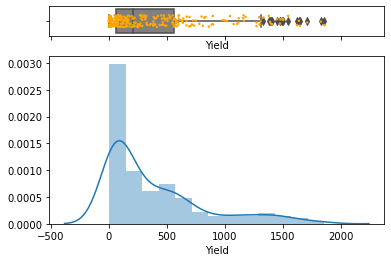

<span style='color:red'>**Figure 1B. Yield per hectar**</span>

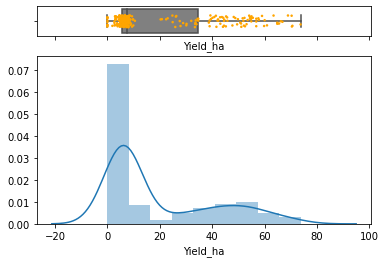

<span style='color:red'>**Figure 1C. Average Rainfall**</span>

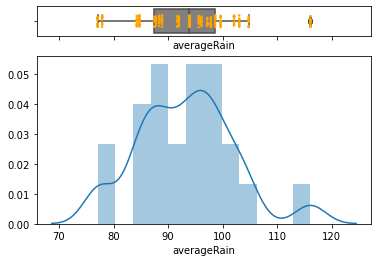

In [20]:
# parts of the code are adapted from here:
# https://python-graph-gallery.com/39-hidden-data-under-boxplot/

import matplotlib.pyplot as plt
from astroML.plotting import setup_text_plots


printmd("**Figure 1A. Crop Yield**", color='red')           # table heading
fig = plt.figure(figsize=(15, 10))                          # figure size
f, (ax_box, ax_hist) = plt.subplots(2,                      # divide the plot into two subplots 
                                    sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}) # (15% and 85% of total area)

ax = sns.boxplot(x='Yield', data=df3, ax=ax_box, color="grey")             # boxplot in grey colour

ax = sns.stripplot(x='Yield', data=df3, 
                   ax=ax_box, color="orange", 
                   jitter=0.2, size=2.5)                     # add data points to boxplot in orange colour

ax = sns.distplot(df3["Yield"], ax=ax_hist)              # add histogram plot            
plt.show() 

printmd("**Figure 1B. Yield per hectar**", color='red')                   # similar to code above
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax = sns.boxplot(x='Yield_ha', data=df3, ax=ax_box, color="grey")
ax = sns.stripplot(x='Yield_ha', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
ax = sns.distplot(df3["Yield_ha"], ax=ax_hist)
plt.show() 

printmd("**Figure 1C. Average Rainfall**", color='red')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
ax = sns.boxplot(x='averageRain', data=df3, ax=ax_box, color="grey")
ax = sns.stripplot(x='averageRain', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
ax = sns.distplot(df3["averageRain"], ax=ax_hist)
plt.show() 

Plot barcharts for nominal data:

Figure 2: We can see there were more male bill-payers.

Figure 3: More non-smokers.

Figure 4: More customers recorded on Saturday and Sunday.

Figure 5: More customers recorded for Dinner.

<span style='color:red'>**Figure** **2** **Barchart of** **Jan**</span>

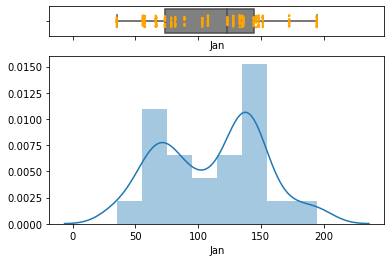

<span style='color:red'>**Figure** **3** **Barchart of** **Feb**</span>

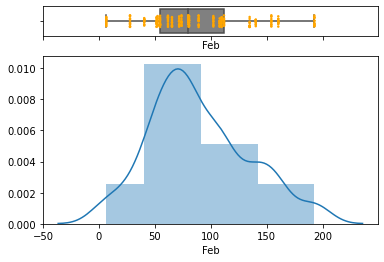

<span style='color:red'>**Figure** **4** **Barchart of** **Mar**</span>

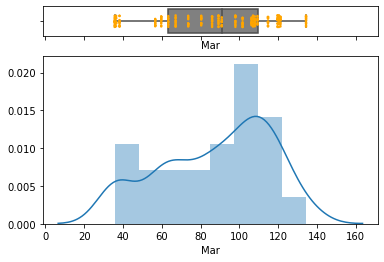

<span style='color:red'>**Figure** **5** **Barchart of** **Jun**</span>

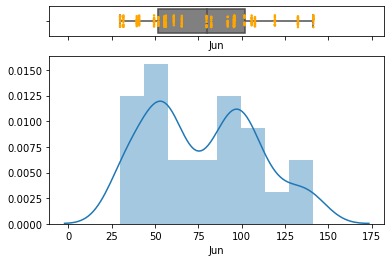

<span style='color:red'>**Figure** **6** **Barchart of** **Jul**</span>

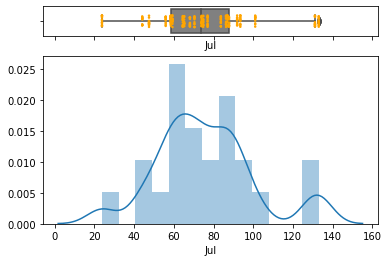

<span style='color:red'>**Figure** **7** **Barchart of** **Aug**</span>

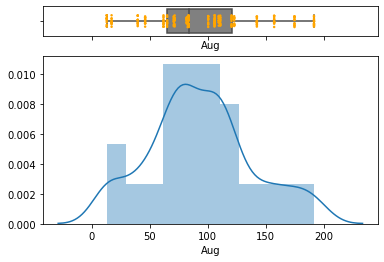

<span style='color:red'>**Figure** **8** **Barchart of** **Sep**</span>

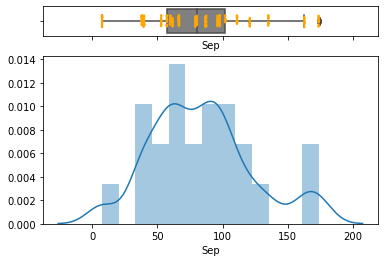

<span style='color:red'>**Figure** **9** **Barchart of** **Oct**</span>

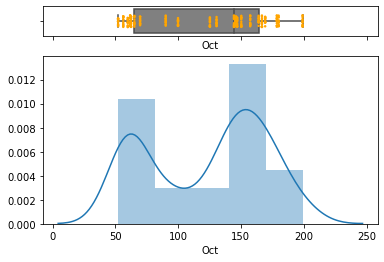

<span style='color:red'>**Figure** **10** **Barchart of** **Nov**</span>

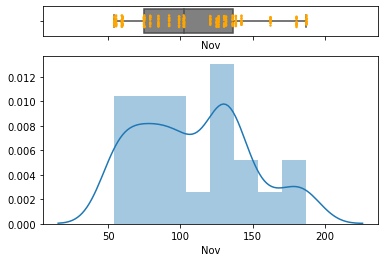

<span style='color:red'>**Figure** **11** **Barchart of** **Dec**</span>

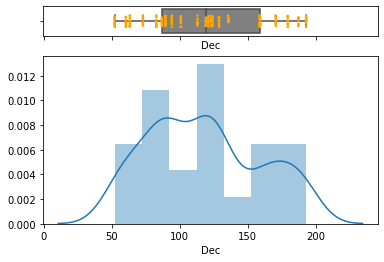

<span style='color:red'>**Figure** **12** **Barchart of** **Jan**</span>

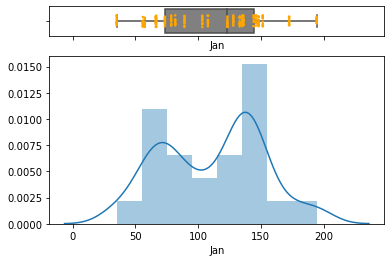

<span style='color:red'>**Figure** **13** **Barchart of** **Feb**</span>

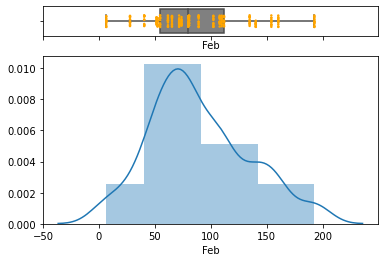

<span style='color:red'>**Figure** **14** **Barchart of** **Mar**</span>

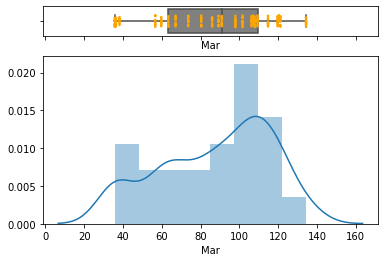

<span style='color:red'>**Figure** **15** **Barchart of** **Jun**</span>

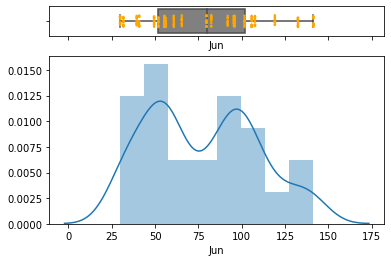

<span style='color:red'>**Figure** **16** **Barchart of** **Jul**</span>

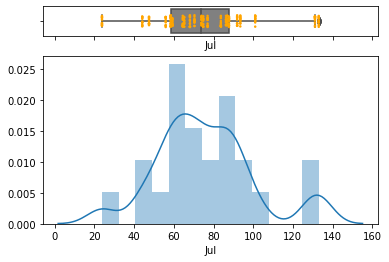

<span style='color:red'>**Figure** **17** **Barchart of** **Aug**</span>

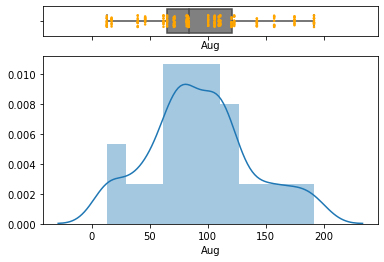

<span style='color:red'>**Figure** **18** **Barchart of** **Sep**</span>

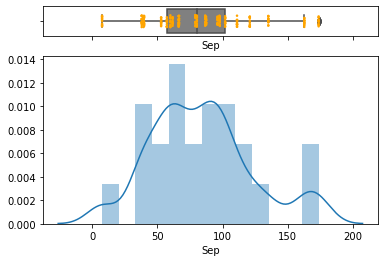

<span style='color:red'>**Figure** **19** **Barchart of** **Oct**</span>

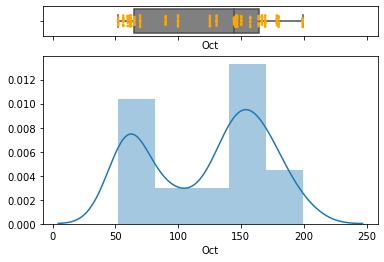

<span style='color:red'>**Figure** **20** **Barchart of** **Nov**</span>

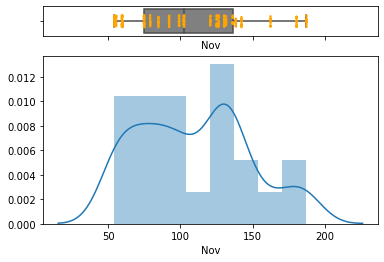

<span style='color:red'>**Figure** **21** **Barchart of** **Dec**</span>

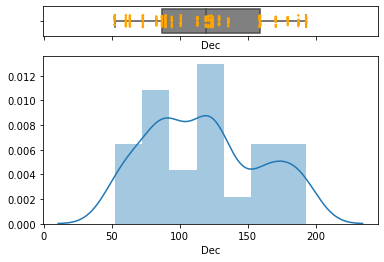

In [28]:
from astroML.plotting import setup_text_plots
vars_list=['Jan', 'Feb', 'Mar', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
i=2                       # counter for table numbers
while i<=17:
    # loop over vars_list
     for var in vars_list:
        # print table numbers and headings
        printmd("**Figure** " + f'**{i}**'+ ' '+ '**Barchart of**' + ' ' + f'**{var}**', color='red') 
        
        
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        ax = sns.boxplot(x=f'{var}', data=df3, ax=ax_box, color="grey")
        ax = sns.stripplot(x=f'{var}', data=df3, ax=ax_box, color="orange", jitter=0.2, size=2.5)
        ax = sns.distplot(df3[f'{var}'], ax=ax_hist)
        plt.show() 
            
        i=i+1

### 4. Exploratory Data Analysis
Are there patterns in the data?
Are specific crops have higher yield?
Is yeald higher in some years?
Is rainfall higher in some years?
Does yield has the same pattern as rainfall?

Figure 6: Judging from the boxplots below it seems that men on average spent more than women and tipped more. Total bill and tip increase with the group size as well.

Total bill is higher on Saturday and Sunday (may be because more people dined on these days) but the median tip seemd to be smaller on Saturday than on Friday and Sunday.

There is a greater variation in total bill for dinner than for lunch but on average the total bill and tip seem to be higher for dinner.

The less messy way in my view to illustrate these points is by using violineplots (see Figure 7).

Please, scroll down to Table 9 to see actual Summary Statistics by Group to see if the visual representation of data gives a good representation of actual data statistics.

<span style='color:red'>**Figure 6: Boxplots**</span>

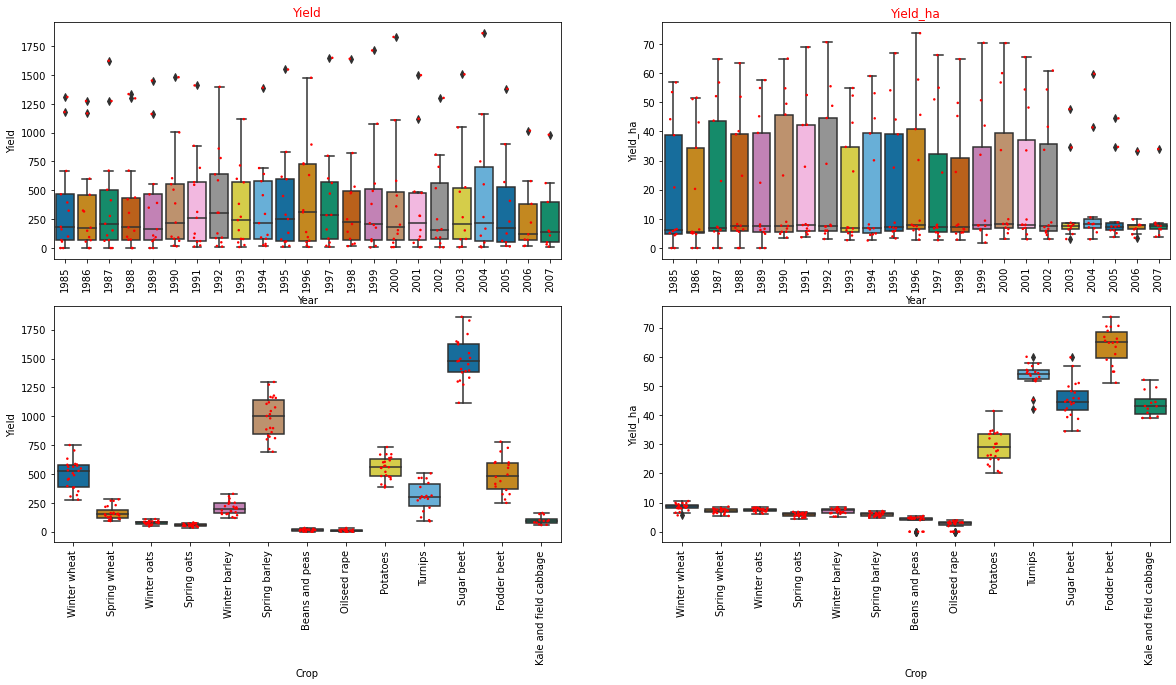

In [45]:
printmd('**Figure 6: Boxplots**', color='red') # print figure number
fig = plt.figure(figsize=(20, 20))             # specify figuresize
ax = fig.add_subplot(421)                      # 4x2 subplots
plt.title("Yield", c='red')               # title
ax = sns.boxplot(y='Yield', x= 'Year', data=df3, palette="colorblind")                     # boxplot
ax = sns.stripplot(y='Yield',  x= 'Year', data=df3, color="red", jitter=0.2, size=2.5)     # add data points
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(422)
plt.title("Yield_ha", c='red')               
ax = sns.boxplot(y='Yield_ha',  x= 'Year', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield_ha',  x= 'Year', data=df3, color="red", jitter=0.2, size=2.5)
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(423)
ax = sns.boxplot(y='Yield', x= 'Crop', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield',  x= 'Crop', data=df3, color="red", jitter=0.2, size=2.5) 
ax.tick_params(axis='x', labelrotation=90)

ax = fig.add_subplot(424)
ax = sns.boxplot(y='Yield_ha', x= 'Crop', data=df3, palette="colorblind")
ax = sns.stripplot(y='Yield_ha',  x= 'Crop', data=df3, color="red", jitter=0.2, size=2.5)

ax.tick_params(axis='x', labelrotation=90)
plt.show()


In [48]:
corr= np.round(df3.corr(), 2)  # correlation matrix
print(corr)                   # print correlation matrix on screen

             Year  Code  CropArea  Yield_ha  Yield   Jan   Feb   Mar   Apr  \
Year         1.00 -0.00     -0.00     -0.09  -0.01 -0.10 -0.01 -0.39 -0.06   
Code        -0.00  1.00      0.47     -0.40   0.11  0.00  0.00  0.00  0.00   
CropArea    -0.00  0.47      1.00     -0.23   0.56 -0.02 -0.03  0.01 -0.02   
Yield_ha    -0.09 -0.40     -0.23      1.00   0.40  0.02  0.06 -0.01  0.05   
Yield       -0.01  0.11      0.56      0.40   1.00 -0.01  0.00 -0.02  0.01   
Jan         -0.10  0.00     -0.02      0.02  -0.01  1.00  0.09  0.15  0.07   
Feb         -0.01  0.00     -0.03      0.06   0.00  0.09  1.00 -0.30 -0.28   
Mar         -0.39  0.00      0.01     -0.01  -0.02  0.15 -0.30  1.00  0.09   
Apr         -0.06  0.00     -0.02      0.05   0.01  0.07 -0.28  0.09  1.00   
May          0.22  0.00      0.01     -0.07  -0.04  0.13 -0.22 -0.15 -0.12   
Jun          0.01  0.00      0.02     -0.03  -0.01 -0.11  0.01 -0.35  0.00   
Jul          0.09 -0.00      0.00     -0.04  -0.03  0.28 -0.01  

In [ ]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
X = df3['Yield_ha'] # x variables 
y = df3['averageT']   # y variable

X_train, X_test, y_train, y_test = train_test_split(X, y,              # split data into train and test
                                                    test_size=0.2,     # split 80-20
                                                    random_state=0)
print (X_train.shape, y_train.shape) # view how many lines are in the training set
print (X_test.shape, y_test.shape)   # view how many lines are in the test set

reg = LinearRegression()  # save regression output to a var
reg.fit(X_train, y_train)    # use training set to run regression
y_pred = reg.predict(X_test) # use test set to predict new y 
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # view actual y vs predicted values

# save results with pickle
pickle.dump(reg, open('reg.pkl', 'wb'))
load_reg=pickle.load(open('reg.pkl', 'rb'))
pred=[[20]]
result=load_reg.predict(pred)
print(result)